# Task 4

**Done by Arina Shinkorenok, group j4132c**

## Description

1.	Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule.

data: bioresponse.csv,

description from Kaggle: “The data is in the comma separated values (CSV) format. Each row in this data set represents a molecule. The first column contains experimental data describing a real biological response; the molecule was seen to elicit this response (1), or not (0). The remaining columns represent molecular descriptors (d1 through d1776), these are caclulated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. The descriptor matrix has been normalized.”).

Use 75% of the dataset to train the model, and the rest of the data to estimate its accuracy.

2.	Modify optimize() function to implement the stochastic gradient descent (SGD) method and Adam optimization method using the numpy library. Apply them to solve the problem from p.1.

3.	For three modifications of gradient descent (GD, SGD and Adam) plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values of the learning rate (at least 5 different learning rates). How does it affect the accuracy of the model?

4.	Compare the accuracy of the models fitted with various BP algorithms.



In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import  datasets, metrics, tree
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# Load dataset
try:
    df = pd.read_csv('/content/drive/My Drive/ML-ITMO/bioresponse.csv', sep=',')
except:
    df = pd.read_csv('bioresponse.csv', sep=',')

In [4]:
# check the dataset size
df.shape

(3751, 1777)

In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


In [6]:
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.describe

<bound method NDFrame.describe of       Activity        D1        D2    D3   D4        D5        D6        D7  \
0            1  0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166   
1            1  0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105   
2            1  0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453   
3            1  0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606   
4            0  0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361   
...        ...       ...       ...   ...  ...       ...       ...       ...   
3746         1  0.033300  0.506409  0.10  0.0  0.209887  0.633426  0.297659   
3747         1  0.133333  0.651023  0.15  0.0  0.151154  0.766505  0.170876   
3748         0  0.200000  0.520564  0.00  0.0  0.179949  0.768785  0.177341   
3749         1  0.100000  0.765646  0.00  0.0  0.536954  0.634936  0.342713   
3750         0  0.133333  0.533952  0.00  0.0  0.347966  0.757971  0.230667   

            D8   

In [8]:
df.columns

Index(['Activity', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=1777)

In [9]:
X = np.array(df.drop(columns=["Activity"]))
y = np.array(df["Activity"])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
X_train = X_train.T
y_train = y_train.reshape((1, -1))

X_test = X_test.T
y_test = y_test.reshape((1, -1))

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1776, 2813) (1776, 938) (1, 2813) (1, 938)


## Part 1

Application of logistic regression method using functions from the "Logistic Regression as a Neural Network - BP alg.ipynb" notebook to predict the biological response of a molecule

In [13]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))

    return s

In [14]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0

    return w, b

In [15]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    """
    m = X.shape[1]
    #print('number of objects = ',len(X))

    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X) + b)                                 # compute activation
    cost = -(1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A) ,axis=1)   # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y ,axis=1)

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [16]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    """

    costs = []

    for i in range(num_iterations):

        # Cost and gradient calculation
        grads, cost = propagate(w,b,X,Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [17]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities
    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1

    return Y_prediction

In [18]:
# model

def model(X_train, Y_train, X_test, Y_test, optimization_algorithm, num_iterations = 2000,
          learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimization_algorithm(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

## Part 2 

Modification of optimize() to implement the stochastic gradient descent (SGD) method and Adam's optimisation method. 

In [19]:
def gradient_descent(w, b, X, Y, num_iterations, learning_rate, print_cost=True):

    # List to store the cost at every 100 iterations
    costs = []

    # Loop through the specified number of iterations
    for i in range(num_iterations):

        # Compute gradients and current cost using the propagate function
        grads, cost = propagate(w, b, X, Y)

        # Extract gradients for weight and bias from the gradients dictionary
        dw = grads['dw']
        db = grads['db']

        # Update weight and bias using the learning rate and computed gradients
        w -= learning_rate * dw
        b -= learning_rate * db

        # Store cost at every 100 iterations
        if i % 100 == 0:
            costs.append(cost[0])

        # Print cost at every 100 iterations if print_cost is True
        if print_cost and i % 100 == 0:
            print('Cost after {} iteration: {:.5f}'.format(i, cost[0]))

    # Store the updated parameters and gradients in dictionaries for return
    params = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}

    return params, grads, costs

In [20]:
def stochastic_gradient_descent(w, b, X, Y, num_iterations, learning_rate, print_cost=True):
    
    # List to store the cost at every 100 iterations
    costs = []
    batch_size=64
    
    # Loop through the specified number of iterations
    for i in range(num_iterations):
        
        # Iterate through the training data in mini-batches of the specified batch size
        for start in range(0, X.shape[1], batch_size):
            stop = start + batch_size
            
            # Extract mini-batch of input and output data
            X_batch = X[:, start:stop]
            Y_batch = Y[:, start:stop]
            
            # Compute gradients and current cost for the current mini-batch
            grads, cost = propagate(w, b, X_batch, Y_batch)
            
            # Extract gradients for weight and bias from the gradients dictionary
            dw = grads['dw']
            db = grads['db']
            
            # Update weight and bias using the learning rate and computed gradients
            w -= learning_rate * dw
            b -= learning_rate * db
        
        # Calculate cost for the entire training data and store it for analysis
        _, cost = propagate(w, b, X, Y)
        if i % 100 == 0:
            costs.append(cost[0])
        
        # Print cost at every 100 iterations if print_cost is True
        if print_cost and i % 100 == 0:
            print('Cost after {} iteration: {:.5f}'.format(i, cost[0]))
    
    # Store the updated parameters and gradients in dictionaries for return
    params = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}
    
    return params, grads, costs

In [21]:
def adam(w, b, X, Y, num_iterations, learning_rate, print_cost=False, beta1=0.9, beta2=0.999, epsilon=1e-8):

    # List to store the cost at every 100 iterations
    costs = []

    # Initialize first moment estimates for weights and bias
    m_dw, m_db = 0, 0

    # Initialize second moment estimates for weights and bias
    v_dw, v_db = 0, 0

    # Initialize time step
    t = 1

    # Loop through the specified number of iterations
    for i in range(num_iterations):
        t += 1 # Increment time step

        # Compute gradients and current cost
        grads, cost = propagate(w, b, X, Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # Update moving averages for gradients
        m_dw = (beta1 * m_dw) + ((1 - beta1) * dw)
        m_db = (beta1 * m_db) + ((1 - beta1) * db)

        # Update moving averages for squared gradients
        v_dw = (beta2 * v_dw) + ((1 - beta2) * (dw ** 2))
        v_db = (beta2 * v_db) + ((1 - beta2) * (db ** 2))

        # Bias correction for moving averages
        m_dw_corrected = m_dw / (1 - beta1 ** t)
        m_db_corrected = m_db / (1 - beta1 ** t)
        v_dw_corrected = v_dw / (1 - beta2 ** t)
        v_db_corrected = v_db / (1 - beta2 ** t)

        # Update parameters using Adam optimization formula
        w -= learning_rate * m_dw_corrected / (np.sqrt(v_dw_corrected) + epsilon)
        b -= learning_rate * m_db_corrected / (np.sqrt(v_db_corrected) + epsilon)

        # Store cost at every 100 iterations
        if i % 100 == 0:
            costs.append(cost[0])

        # Print cost at every 100 iterations if print_cost is True
        if print_cost and i % 100 == 0:
            print('Cost after {} iteration: {:.5f}'.format(i, cost[0]))

    # Store the updated parameters and gradients in dictionaries for return
    params = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}

    return params, grads, costs

## Part 3

For three modifications of gradient descent (GD, SGD and Adam) plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values of the learning rate (at least 5 different learning rates). How does it affect the accuracy of the model?

In [25]:
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]

In [26]:
gradient_descent_arr = []

for LR in learning_rates:
    print(f"LR {LR}")
    gradient_descent_lr = model(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        optimization_algorithm=gradient_descent, 
        learning_rate=LR, 
        print_cost=False,
    )
    gradient_descent_arr.append(gradient_descent_lr)

LR 0.001
train accuracy: 72.52044081052257 %
test accuracy: 72.70788912579957 %
LR 0.005
train accuracy: 77.10629221471739 %
test accuracy: 74.73347547974413 %
LR 0.01
train accuracy: 78.35051546391753 %
test accuracy: 75.5863539445629 %
LR 0.05
train accuracy: 82.26093138997511 %
test accuracy: 76.97228144989339 %
LR 0.1
train accuracy: 83.32740846071809 %
test accuracy: 76.43923240938166 %


In [27]:
stochastic_gradient_descent_arr = []

for LR in learning_rates:
    print(f"LR {LR}")
    stochastic_gradient_descent_lr = model(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        optimization_algorithm=stochastic_gradient_descent, 
        learning_rate=LR, 
        print_cost=False,
    )
    stochastic_gradient_descent_arr.append(stochastic_gradient_descent_lr)

LR 0.001
train accuracy: 81.86988979736935 %
test accuracy: 77.50533049040511 %
LR 0.005
train accuracy: 85.24706718805545 %
test accuracy: 75.90618336886993 %
LR 0.01
train accuracy: 86.84678279416993 %
test accuracy: 75.5863539445629 %
LR 0.05
train accuracy: 90.36615712762176 %
test accuracy: 75.47974413646055 %
LR 0.1
train accuracy: 91.7170280838962 %
test accuracy: 74.84008528784648 %


In [28]:
adam_arr = []

for LR in learning_rates:
    print(f"LR {LR}")
    adam_lr = model(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        optimization_algorithm=adam, 
        learning_rate=LR, 
        print_cost=False,
    )
    adam_arr.append(adam_lr)

LR 0.001
train accuracy: 89.90401706363313 %
test accuracy: 75.69296375266525 %
LR 0.005
train accuracy: 94.24102381798791 %
test accuracy: 73.56076759061834 %
LR 0.01
train accuracy: 94.91645929612514 %
test accuracy: 72.38805970149254 %
LR 0.05
train accuracy: 95.52079630287949 %
test accuracy: 71.32196162046908 %
LR 0.1
train accuracy: 95.73409171702808 %
test accuracy: 70.8955223880597 %


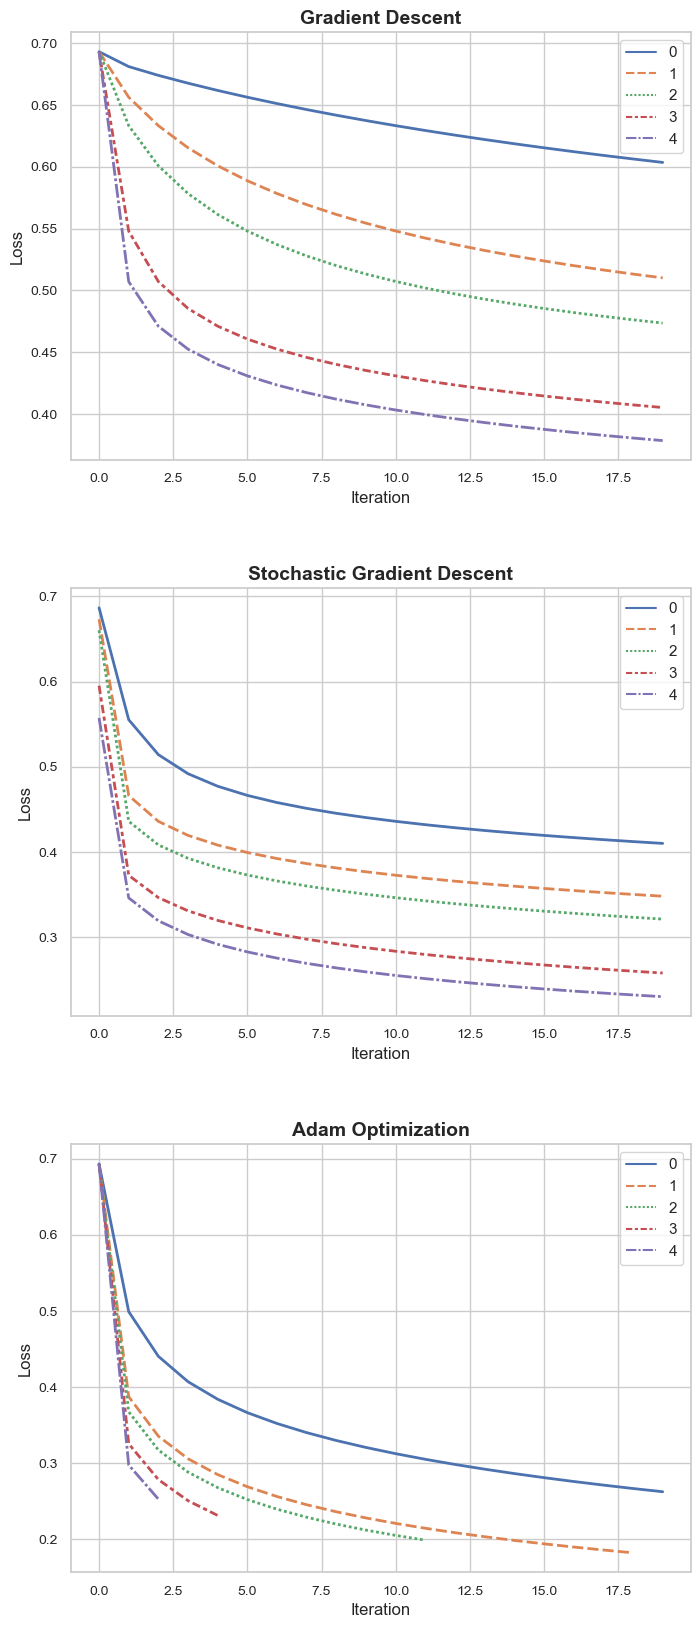

In [37]:
def plot_loss(a, b, c):
    sns.set(style='whitegrid')
    fig, ax = plt.subplots(3, 1, figsize=(8, 20))  
    plt.subplots_adjust(hspace=0.3) 

    colors = ['skyblue', 'lightgreen', 'lightcoral']
    titles = ['Gradient Descent', 'Stochastic Gradient Descent', 'Adam Optimization']
    
    for i, (data, title, color) in enumerate(zip([a, b, c], titles, colors)):
        sns.lineplot(data=data, ax=ax[i], linewidth=2, color=color)
        ax[i].set_xlabel('Iteration', fontsize=12)
        ax[i].set_ylabel('Loss', fontsize=12)
        ax[i].set_title(title, fontsize=14, fontweight='bold')
        ax[i].tick_params(axis='both', which='major', labelsize=10)
    
    plt.show()


plot_loss(
    [gd_lr['costs'] for gd_lr in gradient_descent_arr],
    [sgd_lr['costs'] for sgd_lr in stochastic_gradient_descent_arr],
    [adam_lr['costs'] for adam_lr in adam_arr])

**How does it affect the accuracy of the model?**

The learning rate (LR) in training machine learning models, especially those using gradient-based optimization algorithms like Gradient Descent, Stochastic Gradient Descent (SGD), and Adam, plays a critical role in determining the accuracy and convergence of the model. 

1. Gradient Descent:
As the learning rate increases from 0.001 to 0.1:
- Both training and testing accuracies improve.
- Too small a learning rate (0.001) leads to slow convergence and suboptimal accuracy.
- Too large a learning rate (0.1) might cause overshooting, leading to unstable convergence and decreased accuracy.

2. Stochastic Gradient Descent (SGD):
As the learning rate increases from 0.001 to 0.1:
- Both training and testing accuracies improve.
- SGD tends to perform better than standard Gradient Descent across various learning rates.
- Similar to Gradient Descent, excessively small or large learning rates can harm performance.

3. Adam Optimizer:
As the learning rate increases from 0.001 to 0.1:
- Adam optimizer shows strong performance, especially at lower learning rates (0.001 and 0.005).
- Performance starts degrading with larger learning rates, indicating sensitivity to LR choice.
- Too small a learning rate can lead to slow convergence, while too large a learning rate can cause oscillations and reduced accuracy.

## Part 4

Comparison of the accuracies of models built with different BP algorithms.

Gradient Descent:

|LR| train | test |
|:------:|:------:|:------:|
|0.001|72.52%| 72.71%|
|0.005|77.11%|74.73%|
|0.01|78.35%|75.59%|
|0.05|82.26%|76.97%|
|0.1|83.33%|76.44%|

The Gradient Descent algorithm performed best on the test set at a learning rate of 0.05.

Stochastic Gradient Descent:

|LR| train | test |
|:------:|:------:|:------:|
|0.001|81.87%|77.51%|
|0.005|85.25%|75.91%|
|0.01|86.85%|75.59%|
|0.05|90.37%|75.48%|
|0.1|91.72%|74.84%|

The Stochastic Gradient Descent algorithm performed best on the test set at a learning rate of 0.001.

Adam Optimizer:

|LR| train | test |
|:------:|:------:|:------:|
|0.001|89.90%|75.69%|
|0.005|94.24%|73.56%|
|0.01|94.92%|72.39%|
|0.05|95.52%|71.32%|
|0.1|95.73%|70.90%|

Adam's Optimisation algorithm performed best on the test set at a learning rate of 0.001.


Stochastic Gradient Descent (SGD) generally outperforms the standard gradient descent in all learning metrics. It shows higher training (throughout training) and testing accuracy (at training rates between 0.001 and 0.01).

Adam's optimiser performs well among the three algorithms, especially at low learning rates (0.001 and 0.005), but as the learning rate increases, its performance starts to decrease, indicating the importance of choosing the appropriate learning rate.

In all cases, the training accuracy is higher than the testing accuracy, suggesting a certain degree of overfitting, especially in models trained with higher learning rates.

For all three algorithms, there is a tendency for accuracy to also increase with increasing learning rate up to a certain point, after which it starts to decrease due to overfitting of optimal weights.

## Conclusion

Choosing an appropriate learning rate is crucial. It requires experimentation and validation on a validation dataset. Too small rates might lead to slow convergence, while overly large rates might prevent convergence or cause the model to overshoot the optimal solution. The best learning rate depends on the specific dataset and problem at hand, and it's often beneficial to employ techniques like learning rate schedules or adaptive learning rate methods to fine-tune the training process.